In [3]:
import tensorflow as tf
import keras
from keras import layers
import matplotlib.pyplot as plt

In [4]:
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 616s 4us/step


In [5]:
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)


In [6]:
x_train = x_train.reshape(-1, 32 * 32 * 3)
x_test = x_test.reshape(-1, 32 * 32 * 3)

In [7]:
model = keras.Sequential([
    layers.Dense(512, activation='relu', input_shape=(32 * 32 * 3,)),
    layers.Dense(256, activation='relu'),
    layers.Dense(10, activation='softmax')
])


/home/aditya/Desktop/Aditya/Tranberg USB/USB Drive/Aditya new/Aditya/CSM A/III Year/I Semester/PS_Cyber_Detective/venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
I0000 00:00:1729330357.724458 1527596 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-10-19 15:02:37.763145: W tensorflow/core/common_runtime/gpu/gpu_device.cc:2343] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.te

In [8]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


Epoch 1/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 19s 14ms/step - accuracy: 0.2716 - loss: 2.0670 - val_accuracy: 0.3734 - val_loss: 1.7457
Epoch 2/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 18s 14ms/step - accuracy: 0.3845 - loss: 1.7204 - val_accuracy: 0.4054 - val_loss: 1.6671
Epoch 3/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 18s 14ms/step - accuracy: 0.4163 - loss: 1.6240 - val_accuracy: 0.4090 - val_loss: 1.6495
Epoch 4/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 18s 14ms/step - accuracy: 0.4378 - loss: 1.5648 - val_accuracy: 0.3985 - val_loss: 1.6710
Epoch 5/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 18s 14ms/step - accuracy: 0.4530 - loss: 1.5241 - val_accuracy: 0.4390 - val_loss: 1.5856
Epoch 6/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 18s 14ms/step - accuracy: 0.4663 - loss: 1.4909 - val_accuracy: 0.4530 - val_loss: 1.5408
Epoch 7/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 18s 15ms/step - accuracy: 0.4735 - loss: 1.4657 - val_accuracy: 0.4518 - val_loss: 1.5308
Epoch 8/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 18s 14ms/step - accuracy: 0.4841 -

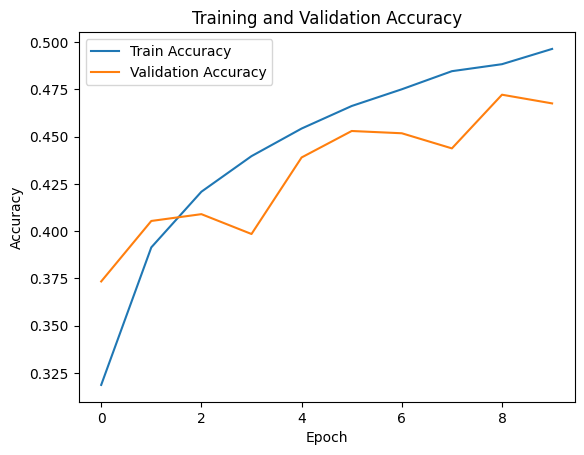

In [9]:
out = model.fit(x_train, y_train, epochs=10, batch_size=32, validation_split=0.2)


test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f'Test accuracy: {test_accuracy:.4f}')

# Plot training & validation accuracy
plt.plot(out.history['accuracy'], label='Train Accuracy')
plt.plot(out.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
